In [11]:
import os
import pandas as pd
import numpy as np
import lingam
from lingam.utils import make_dot
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

inputs_path = os.path.join(os.getcwd(), 'data', 'inputs')

### VAR(1) with no shifts

$$
x_{1,t} = 0.2x_{1,t-1} + 0.7x_{3,t-1} + N(0, 1)\\ 
x_{2,t} = 0.2x_{2,t-1} + N(0, 1)\\ 
x_{3,t} = 0.7x_{1,t-1} + 0.2x_{2,t-1} + N(0, 1)\\ 
$$

<Axes: >

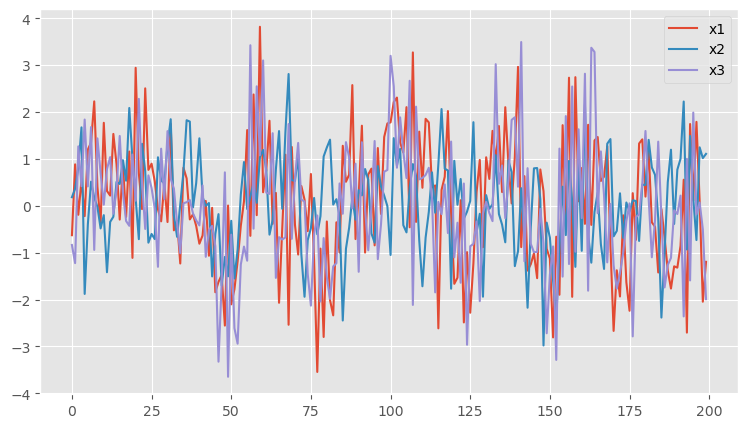

In [12]:
X0 = pd.read_csv(os.path.join(inputs_path, 'gaussian_var_sim0.csv'))

X0.plot(figsize=(9, 5))

In [13]:
shapiro_wilk_test = stats.shapiro(X0)
shapiro_wilk_test.pvalue

0.5870864391326904

In [14]:
p = 1

var_lingam = lingam.VARLiNGAM(lags=p)
var_lingam_fit = var_lingam.fit(X0)

print("Causal Order: \n\n", var_lingam_fit.causal_order_, "\n\n")
for i in range(p+1):
    print("B{}: \n\n".format(i), var_lingam_fit.adjacency_matrices_[i], "\n\n")

Causal Order: 

 [1, 2, 0] 


B0: 

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 


B1: 

 [[ 0.1235755  -0.02515394  0.6362846 ]
 [ 0.02536501  0.26051353  0.03303652]
 [ 0.68135403  0.12003315  0.02874243]] 




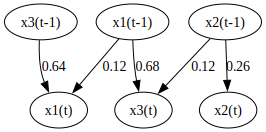

In [15]:
labels = []
for i in range(p+1):
    for colname in X0.columns:
        if i == 0:
            labels.append("{}(t)".format(colname, i))
        else:
            labels.append("{}(t-{})".format(colname, i))

make_dot(np.hstack(var_lingam_fit.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

### Variance Shifted VAR(1)

Enviroment $a$:
$$
x^a_{1,t} = 0.2x^a_{1,t-1} + 0.7x^a_{3,t-1} + N(0, 1)\\ 
x^a_{2,t} = 0.2x^a_{2,t-1} + N(0, 1)\\ 
x^a_{3,t} = 0.7x^a_{1,t-1} + 0.2x^a_{2,t-1} + N(0, 1)\\ 
$$

Enviroments $b$:
$$
x^b_{1,t} = 0.2x^b_{1,t-1} + 0.7x^b_{3,t-1} + N(0, 1)\\ 
x^b_{2,t} = 0.2x^b_{2,t-1} + N(0, 1)\\ 
x^b_{3,t} = 0.7x^b_{1,t-1} + 0.2x^a_{2,t-1} + N(0, 3)\\ 
$$

<Axes: >

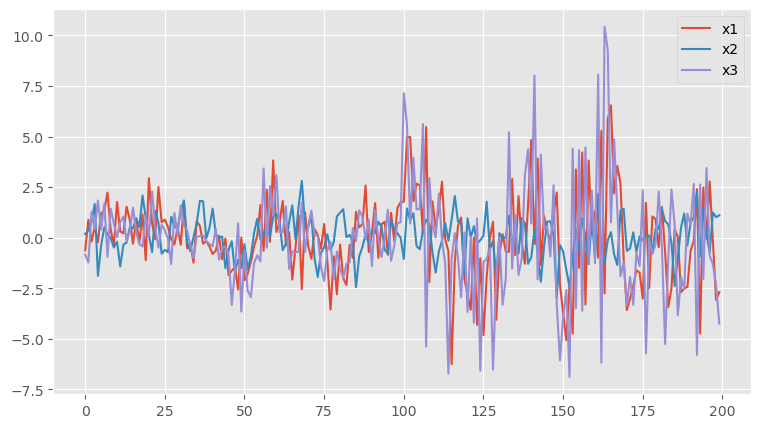

In [16]:
X1 = pd.read_csv(os.path.join(inputs_path, 'gaussian_var_sim1.csv'))

X1.plot(figsize=(9, 5))

In [17]:
shapiro_wilk_test = stats.shapiro(X1)
shapiro_wilk_test.pvalue

1.628625484256449e-14

In [18]:
p = 1

var_lingam1 = lingam.VARLiNGAM(lags=p)
var_lingam_fit1 = var_lingam1.fit(X1)

print("Causal Order: \n\n", var_lingam_fit1.causal_order_, "\n\n")
for i in range(p+1):
    print("B{}: \n\n".format(i), var_lingam_fit1.adjacency_matrices_[i], "\n\n")

Causal Order: 

 [2, 0, 1] 


B0: 

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 


B1: 

 [[ 0.15364269 -0.03000682  0.68056497]
 [ 0.00473915  0.2637366   0.01683255]
 [ 0.58476683 -0.00791284 -0.01186077]] 




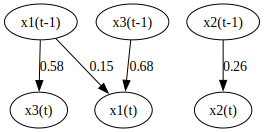

In [19]:
labels = []
for i in range(p+1):
    for colname in X1.columns:
        if i == 0:
            labels.append("{}(t)".format(colname, i))
        else:
            labels.append("{}(t-{})".format(colname, i))

make_dot(np.hstack(var_lingam_fit1.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

### Variance Shifted SVAR(1) (Model C of section 6 from Pfister et al. (2018))

Environment $a$:
$$
x^a_{1,t} = 0.7x^a_{3,t} + 0.5x^a_{2,t-1} + N(0, 1)\\ 
x^a_{2,t} = 0.2x^a_{2,t-1} + N(0, 1)\\ 
x^a_{3,t} = 0.2x^a_{2,t} + N(0, 1)\\ 
$$

Environment $b$:
$$
x^b_{1,t} = 0.7x^b_{3,t} + 0.5x^a_{2,t-1} + N(0, 1)\\ 
x^b_{2,t} = 0.2x^b_{2,t-1} + N(0, 1)\\ 
x^b_{3,t} = 0.2x^a_{2,t} + N(0, 3)\\ 
$$

<Axes: >

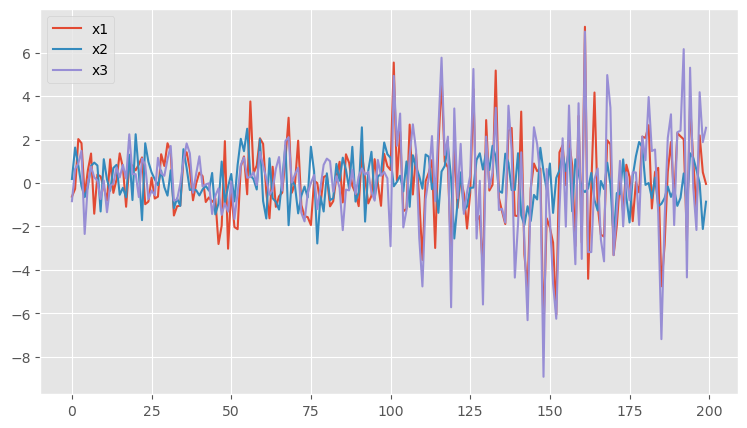

In [20]:
X2 = pd.read_csv(os.path.join(inputs_path, 'gaussian_svar_sim0.csv'))

X2.plot(figsize=(9, 5))

In [21]:
shapiro_wilk_test = stats.shapiro(X2)
shapiro_wilk_test.pvalue

1.521196363318822e-12

In [22]:
p = 1

var_lingam2 = lingam.VARLiNGAM(lags=p)
var_lingam_fit2 = var_lingam2.fit(X2)

print("Causal Order: \n\n", var_lingam_fit2.causal_order_, "\n\n")
for i in range(p+1):
    print("B{}: \n\n".format(i), var_lingam_fit2.adjacency_matrices_[i], "\n\n")

Causal Order: 

 [2, 1, 0] 


B0: 

 [[0.         0.         0.69213541]
 [0.         0.         0.        ]
 [0.         0.         0.        ]] 


B1: 

 [[-0.00296252  0.54354528 -0.0449365 ]
 [-0.04272659  0.0990882   0.00477824]
 [ 0.02876374  0.05427201 -0.06264444]] 




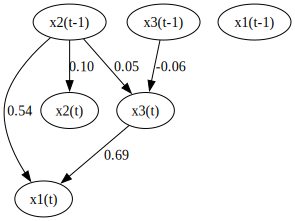

In [23]:
labels = []
for i in range(p+1):
    for colname in X2.columns:
        if i == 0:
            labels.append("{}(t)".format(colname, i))
        else:
            labels.append("{}(t-{})".format(colname, i))

make_dot(np.hstack(var_lingam_fit2.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)